# First approach - ML and 3-D distance

In [1]:
import numpy as np
from sklearn.cluster import KMeans

nomi= ['player1','player2','player3','Winner']
n= len(nomi)
X = np.random.random([1000,3])*100
X

kmeans = KMeans(
           init="k-means++",
           n_clusters=n,
           n_init=10,
           max_iter=300,
           random_state=42
 )

kmeans.fit(X)
kmeans.cluster_centers_

array([[34.27571039, 29.59539303, 73.68209097],
       [25.81615216, 68.98357126, 28.83104274],
       [72.19181175, 32.06514014, 25.7952511 ],
       [68.20513007, 77.2432079 , 68.47638623]])

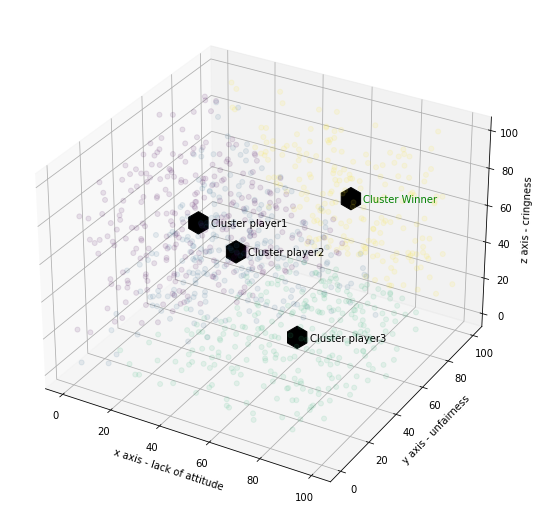

In [2]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=[20,14])


ax = fig.add_subplot(1,2,1, projection='3d')


xs = X[:,0]
ys = X[:,1]
zs = X[:,2]
    
    
ax.scatter(xs, ys, zs, marker='.',s=100,c=kmeans.labels_,alpha=0.1)

centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1],centers[:, 2], c='k',s=500, alpha=1, marker='h')

for i in range(kmeans.cluster_centers_.shape[0]-1):
        ax.text(float(kmeans.cluster_centers_[i,[0]])+5,float(kmeans.cluster_centers_[i,[1]]),float(kmeans.cluster_centers_[i,[2]]),f'Cluster {nomi[i]}', color='k')

ax.text(float(kmeans.cluster_centers_[-1,[0]])+5,float(kmeans.cluster_centers_[-1,[1]]),float(kmeans.cluster_centers_[-1,[2]]),f'Cluster {nomi[-1]}', color='green')
 

ax.set_xlabel(f'x axis - lack of attitude')
ax.set_ylabel(f'y axis - unfairness')
ax.set_zlabel(f'z axis - cringness')
plt.show()

In [3]:
import numpy as np
distanze=dict()
for i in range(n):
    p1 = np.array([centers[i,0],centers[i,1],centers[i,2]])
    p2 = np.array([centers[-1,0],centers[-1,1],centers[-1,2]])

    squared_dist = np.sum((p1-p2)**2, axis=0)
    dist = np.sqrt(squared_dist)
    distanze.update({nomi[i]:dist})

In [4]:
# Import dependencies
import plotly
import plotly.graph_objs as go

# Configure Plotly to be rendered inline in the notebook.
plotly.offline.init_notebook_mode()

# Configure the trace.
trace = go.Scatter3d(x = centers[:, 0],
                     y = centers[:, 1],
                     z = centers[:, 2],
 
    mode='markers',
    hovertext = ([f'{i[0]} è distante {round(i[1],2)}' for i in distanze.items()]),
    marker={
        'size': 10,
        'opacity': 0.8,
        'symbol':'diamond-open'  #'square-open'
    }
)


# Configure the layout.
layout = go.Layout(
    margin={'l': 0, 'r': 0, 'b': 100, 't': 0}
)

data = [trace]

plot_figure = go.Figure(data=data, layout=layout)

# Render the plot.
plotly.offline.iplot(plot_figure)

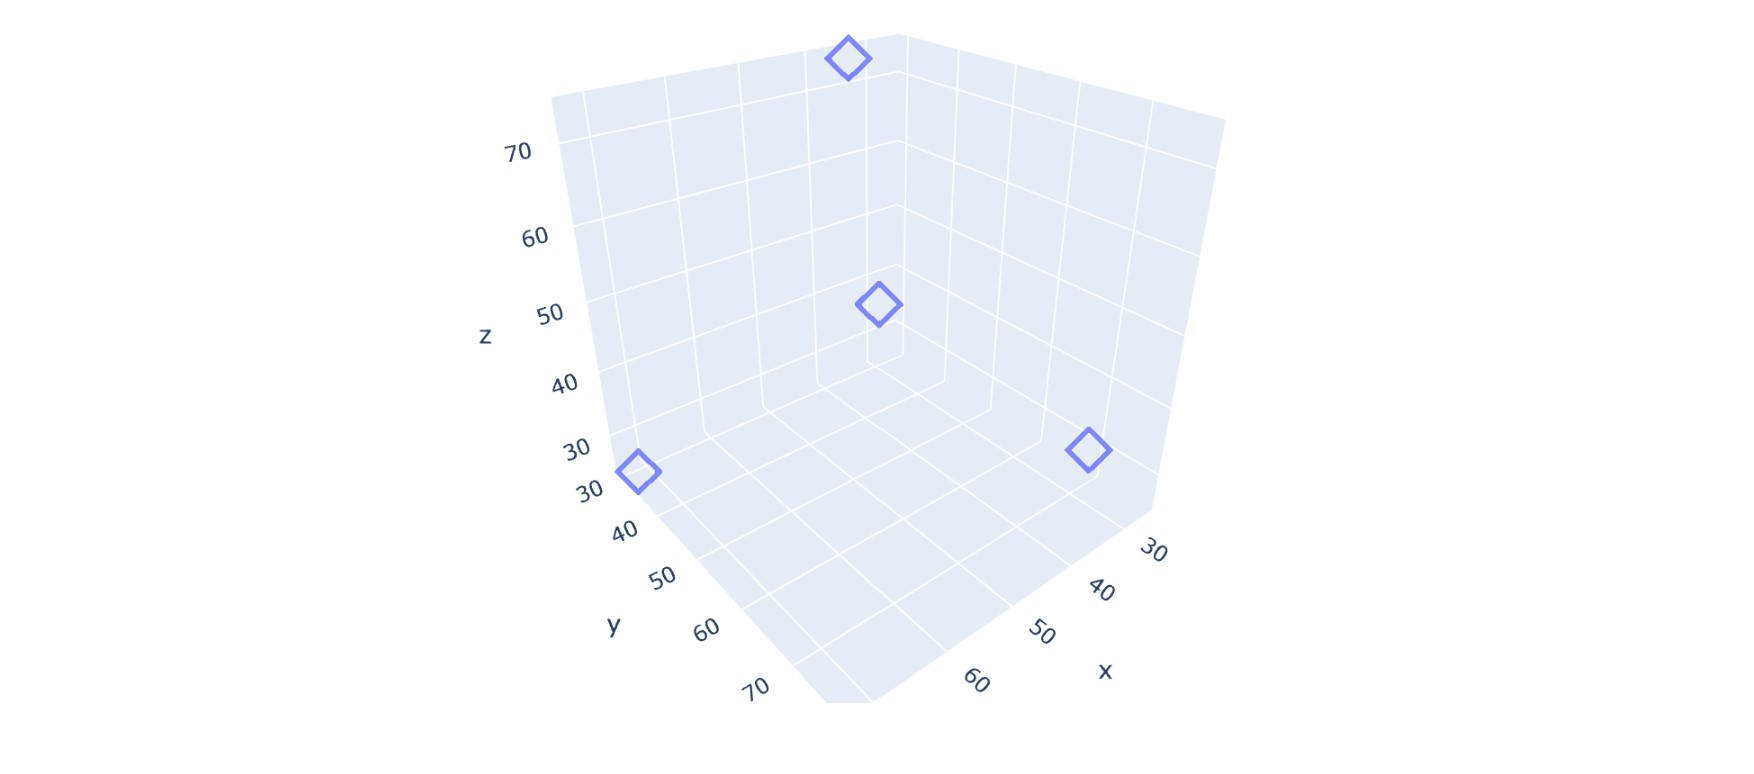

In [10]:
from IPython.display import Image
Image(filename='screen1.jpg') 

# Second approach - Bar chart

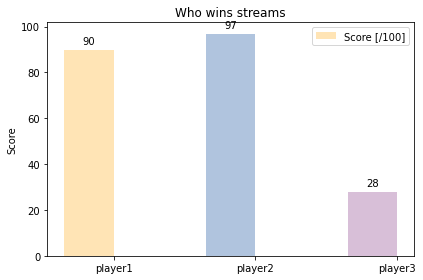

In [8]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['player1','player2','player3']





score = (np.random.random(len(labels))*100).astype("int64")

x = np.arange(len(labels)) 
width = 0.35  
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, score, width, label='Score [/100]',color=['moccasin', 'lightsteelblue', 'thistle', 'lightgreen', 'lightpink','yellow'])#color=(0.9, 0.6, 0.6, 0.6))


ax.set_ylabel('Score')
ax.set_title('Who wins streams')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.rcParams["font.size"] = 10
plt.rcParams["font.size"] = 10



autolabel(rects1)
#autolabel(rects2)

fig.tight_layout()

plt.show()

In [ ]:
# VIOLIN PLOT - WINS WHO REACH THE TOP

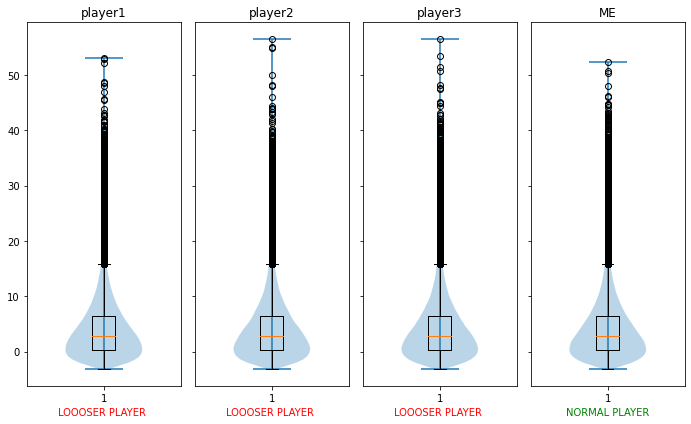

In [10]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np



players = ['player1','player2','player3','ME']
n=len(players)

fig, sp = plt.subplots(1,n,sharey = True)
for i in range(0,n):
    score_i = n* np.random.exponential(size=300000) - 3.2 * (1-np.random.exponential(size=300000))
    
    sp[i].boxplot(score_i);
    sp[i].violinplot(score_i);
    if players[i] == 'ME':
        sp[i].set_xlabel("NORMAL PLAYER", color='green')
    else:
        sp[i].set_xlabel("LOOOSER PLAYER ", color='red')
    sp[i].set_title(players[i])
    
    plt.tight_layout()
    fig.set_figheight(6)
    fig.set_figwidth(6*1.618)
    
    plt.rcParams["font.size"] = 10


## HISTOGRAM

No handles with labels found to put in legend.
No handles with labels found to put in legend.


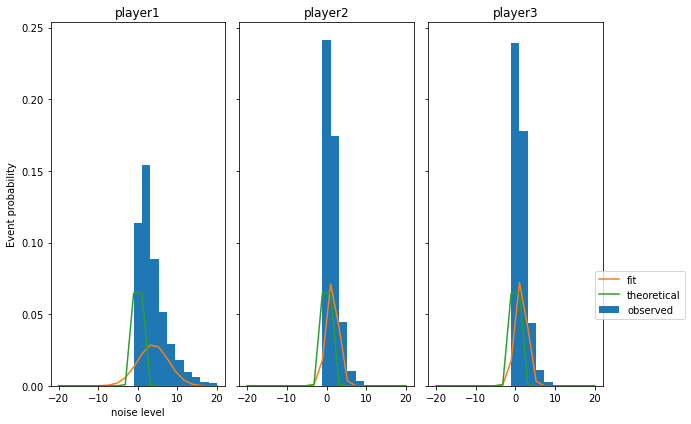

In [39]:
import numpy as np
import matplotlib.pyplot as plt

players = ['player1','player2','player3']
n=len(players)
fig, ax = plt.subplots(1,n,sharey = True)
for i in range(0,n):
    score_i = n* np.random.exponential(size=30000)*random.randint(0,30)/10
    
    exp_mean = score_i.mean() 
    exp_std = score_i.std()
    ax[0].set_ylabel("Event probability")
    # computing a gaussian distribution from mean and standard deviation
    x = np.linspace(-20,20,20)
    gauss_exp = np.exp(-(x-exp_mean)**2/(2*exp_std**2))/(np.pi*np.sqrt(2)*exp_std)
    gauss_theo = np.exp(-(x)**2/(2))/(np.pi*np.sqrt(2)) 
    dx = len(x)/(x[-1]-x[0]) # we are representing densities - the area is 1! - we need the width of each bar
    ax[i].hist(score_i,bins=x, density=True, label="observed") 
    ax[i].plot(x, gauss_exp*dx, label="fit")
    ax[i].plot(x, gauss_theo*dx, label="theoretical")
    ax[-1].legend(loc="center right", bbox_to_anchor=(1., 0., 0.5, 0.5));
    ax[0].set_xlabel("noise level")
    ax[i].set_title(players[i])
    
    plt.tight_layout()
    fig.set_figheight(6)
    fig.set_figwidth(6*1.618)
    
plt.rcParams["font.size"] = 10


# Distribution selection

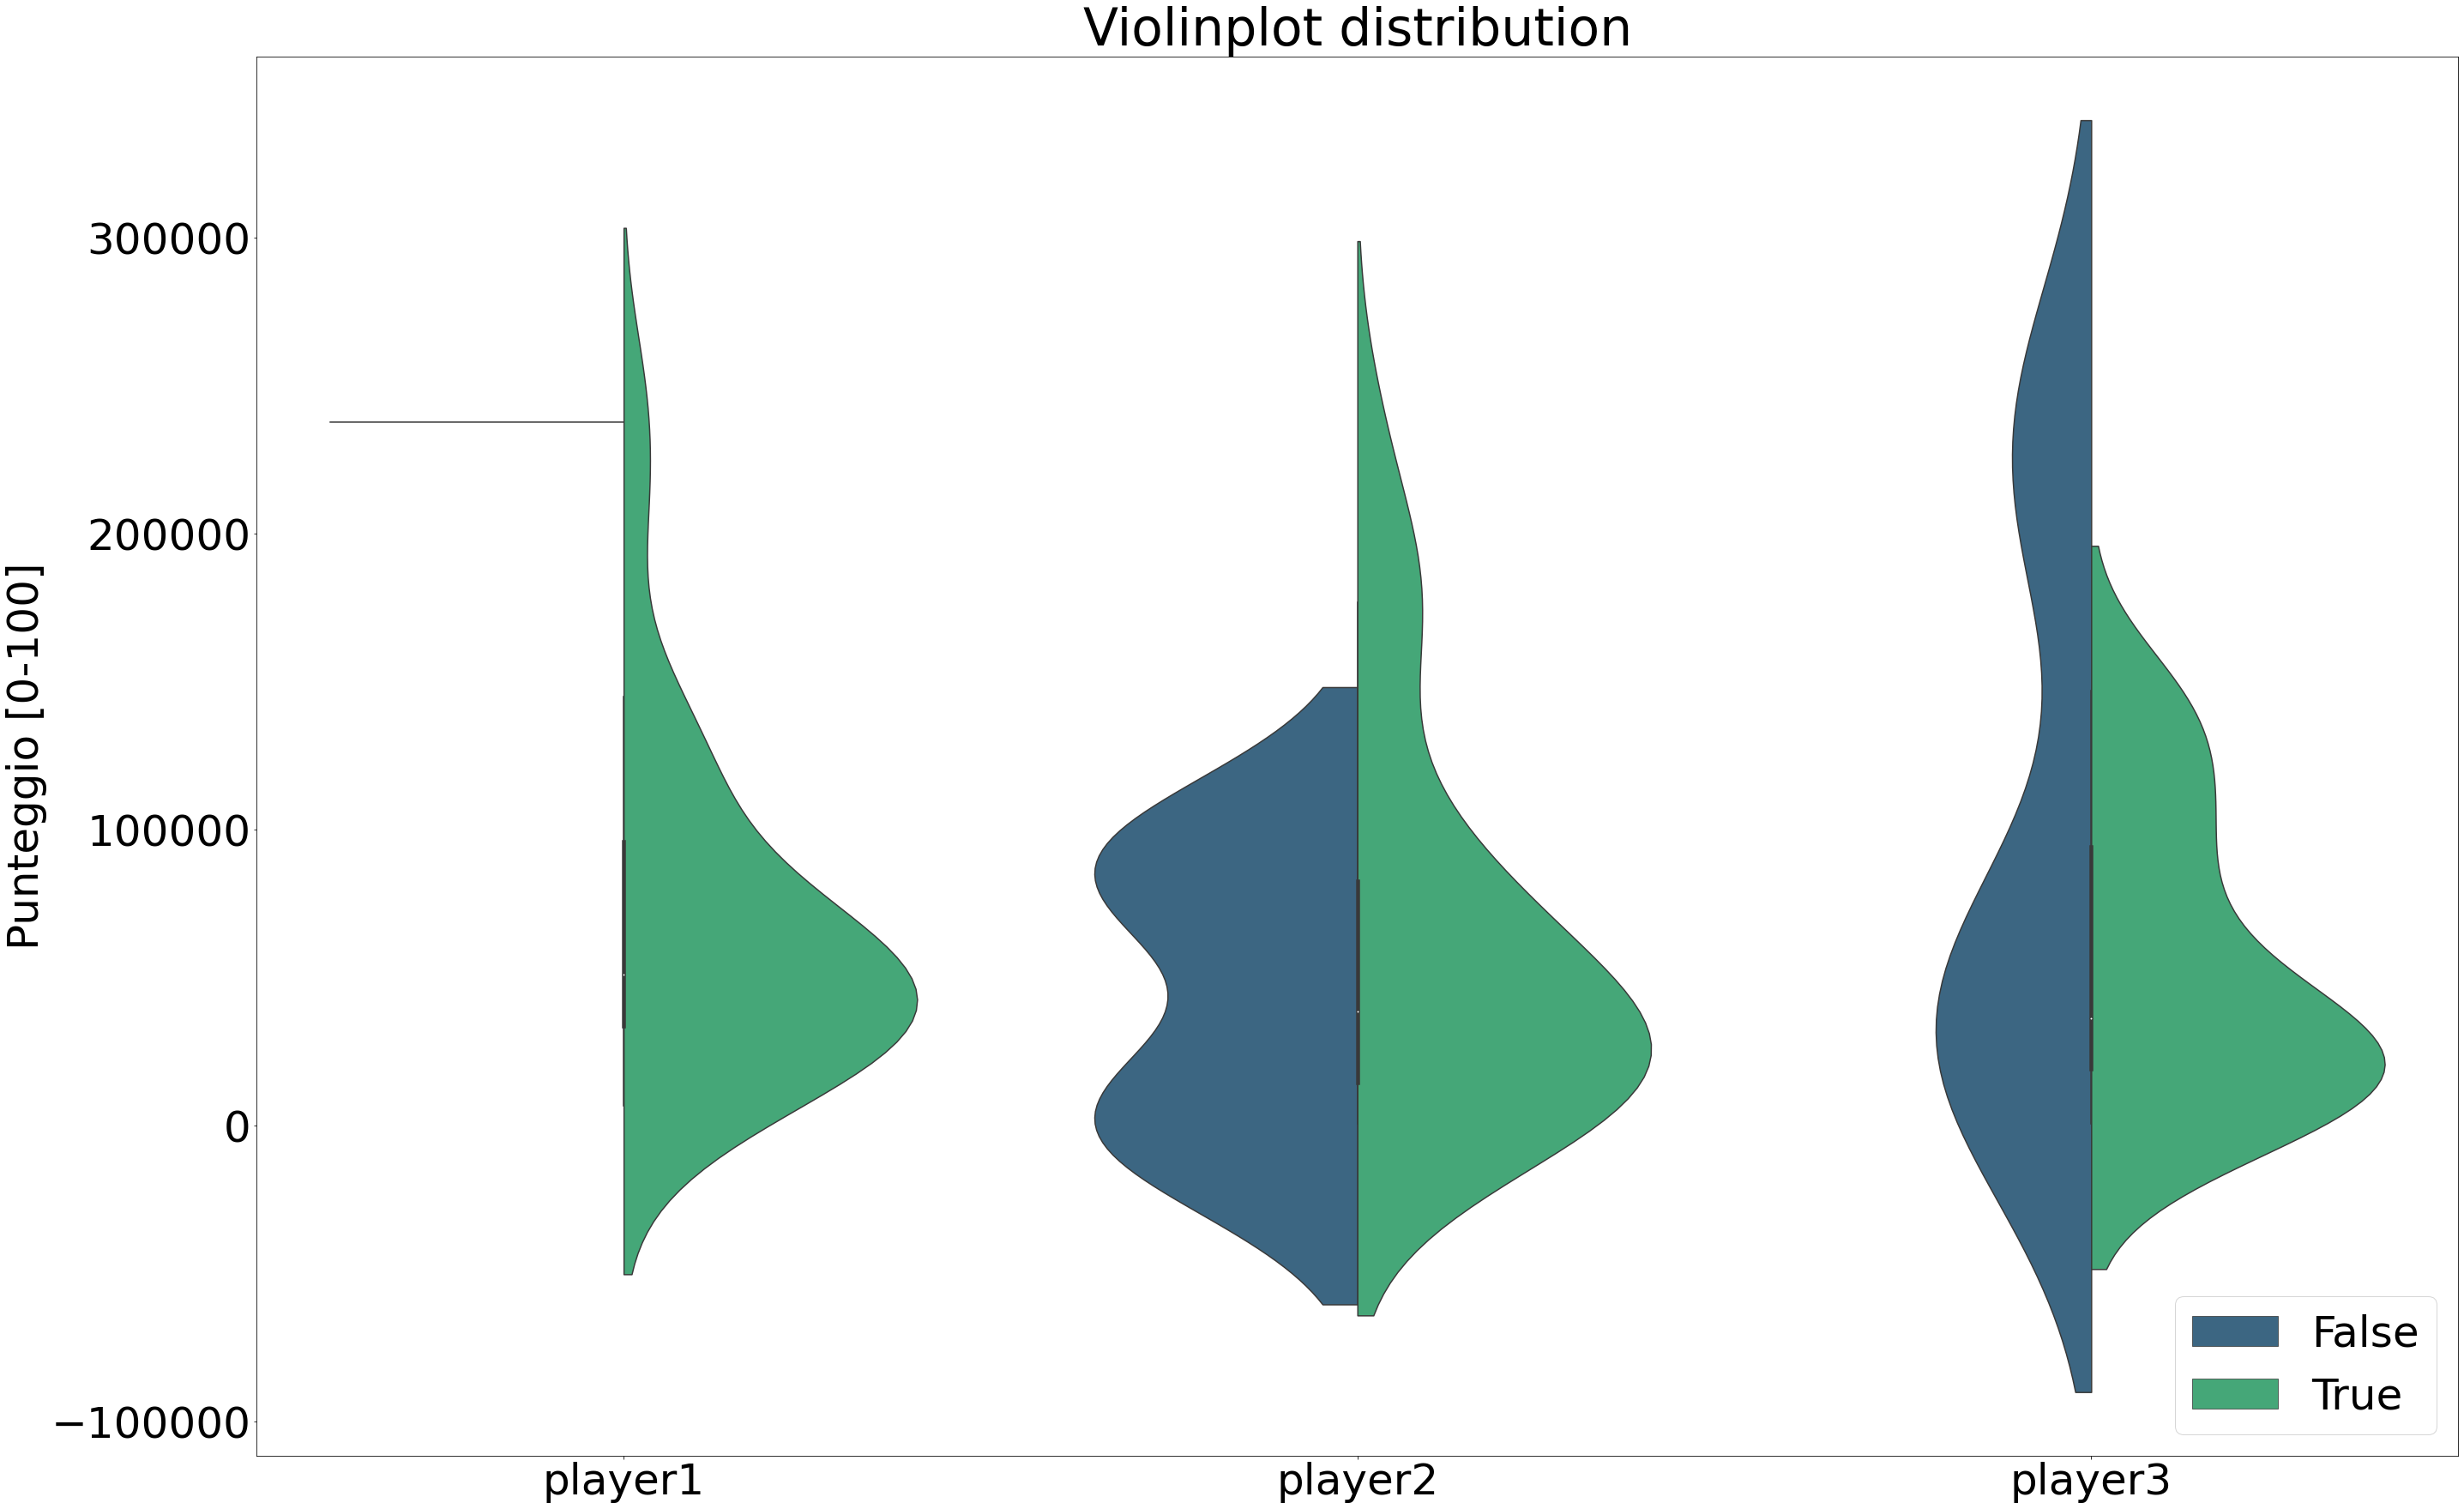

In [46]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

labels = ['player1','player2','player3']
names= []
rating = []
rating_bool = []
j=0
threshold = 20

while j<10*len(labels):
    for i in range(0,len(labels)):
        names.append(labels[i])
        a= random.randint(0,random.randint(0,300000))
        rating.append(a)
        if a % threshold:
            b = True
        #elif a>=threshold:
        else:
                b = False
        rating_bool.append(b)
        
        
    j+=1
    

data_rating = {'Names':names, 'Rating':rating,'Boolean':rating_bool}

dataf = pd.DataFrame(data=data_rating)

fig,ax = plt.subplots(figsize=(46,30))
sns.violinplot(x="Names", y="Rating", hue="Boolean",
                    data=data_rating, palette="viridis", split=True, bw=0.5, ax=ax)
plt.ylabel("Punteggio [0-100]")
plt.legend(loc="lower right")
plt.title("Violinplot distribution");
plt.rcParams["font.size"] = 50
plt.rcParams["font.size"] = 50

# STACKED - HIST

<AxesSubplot:ylabel='Frequency'>

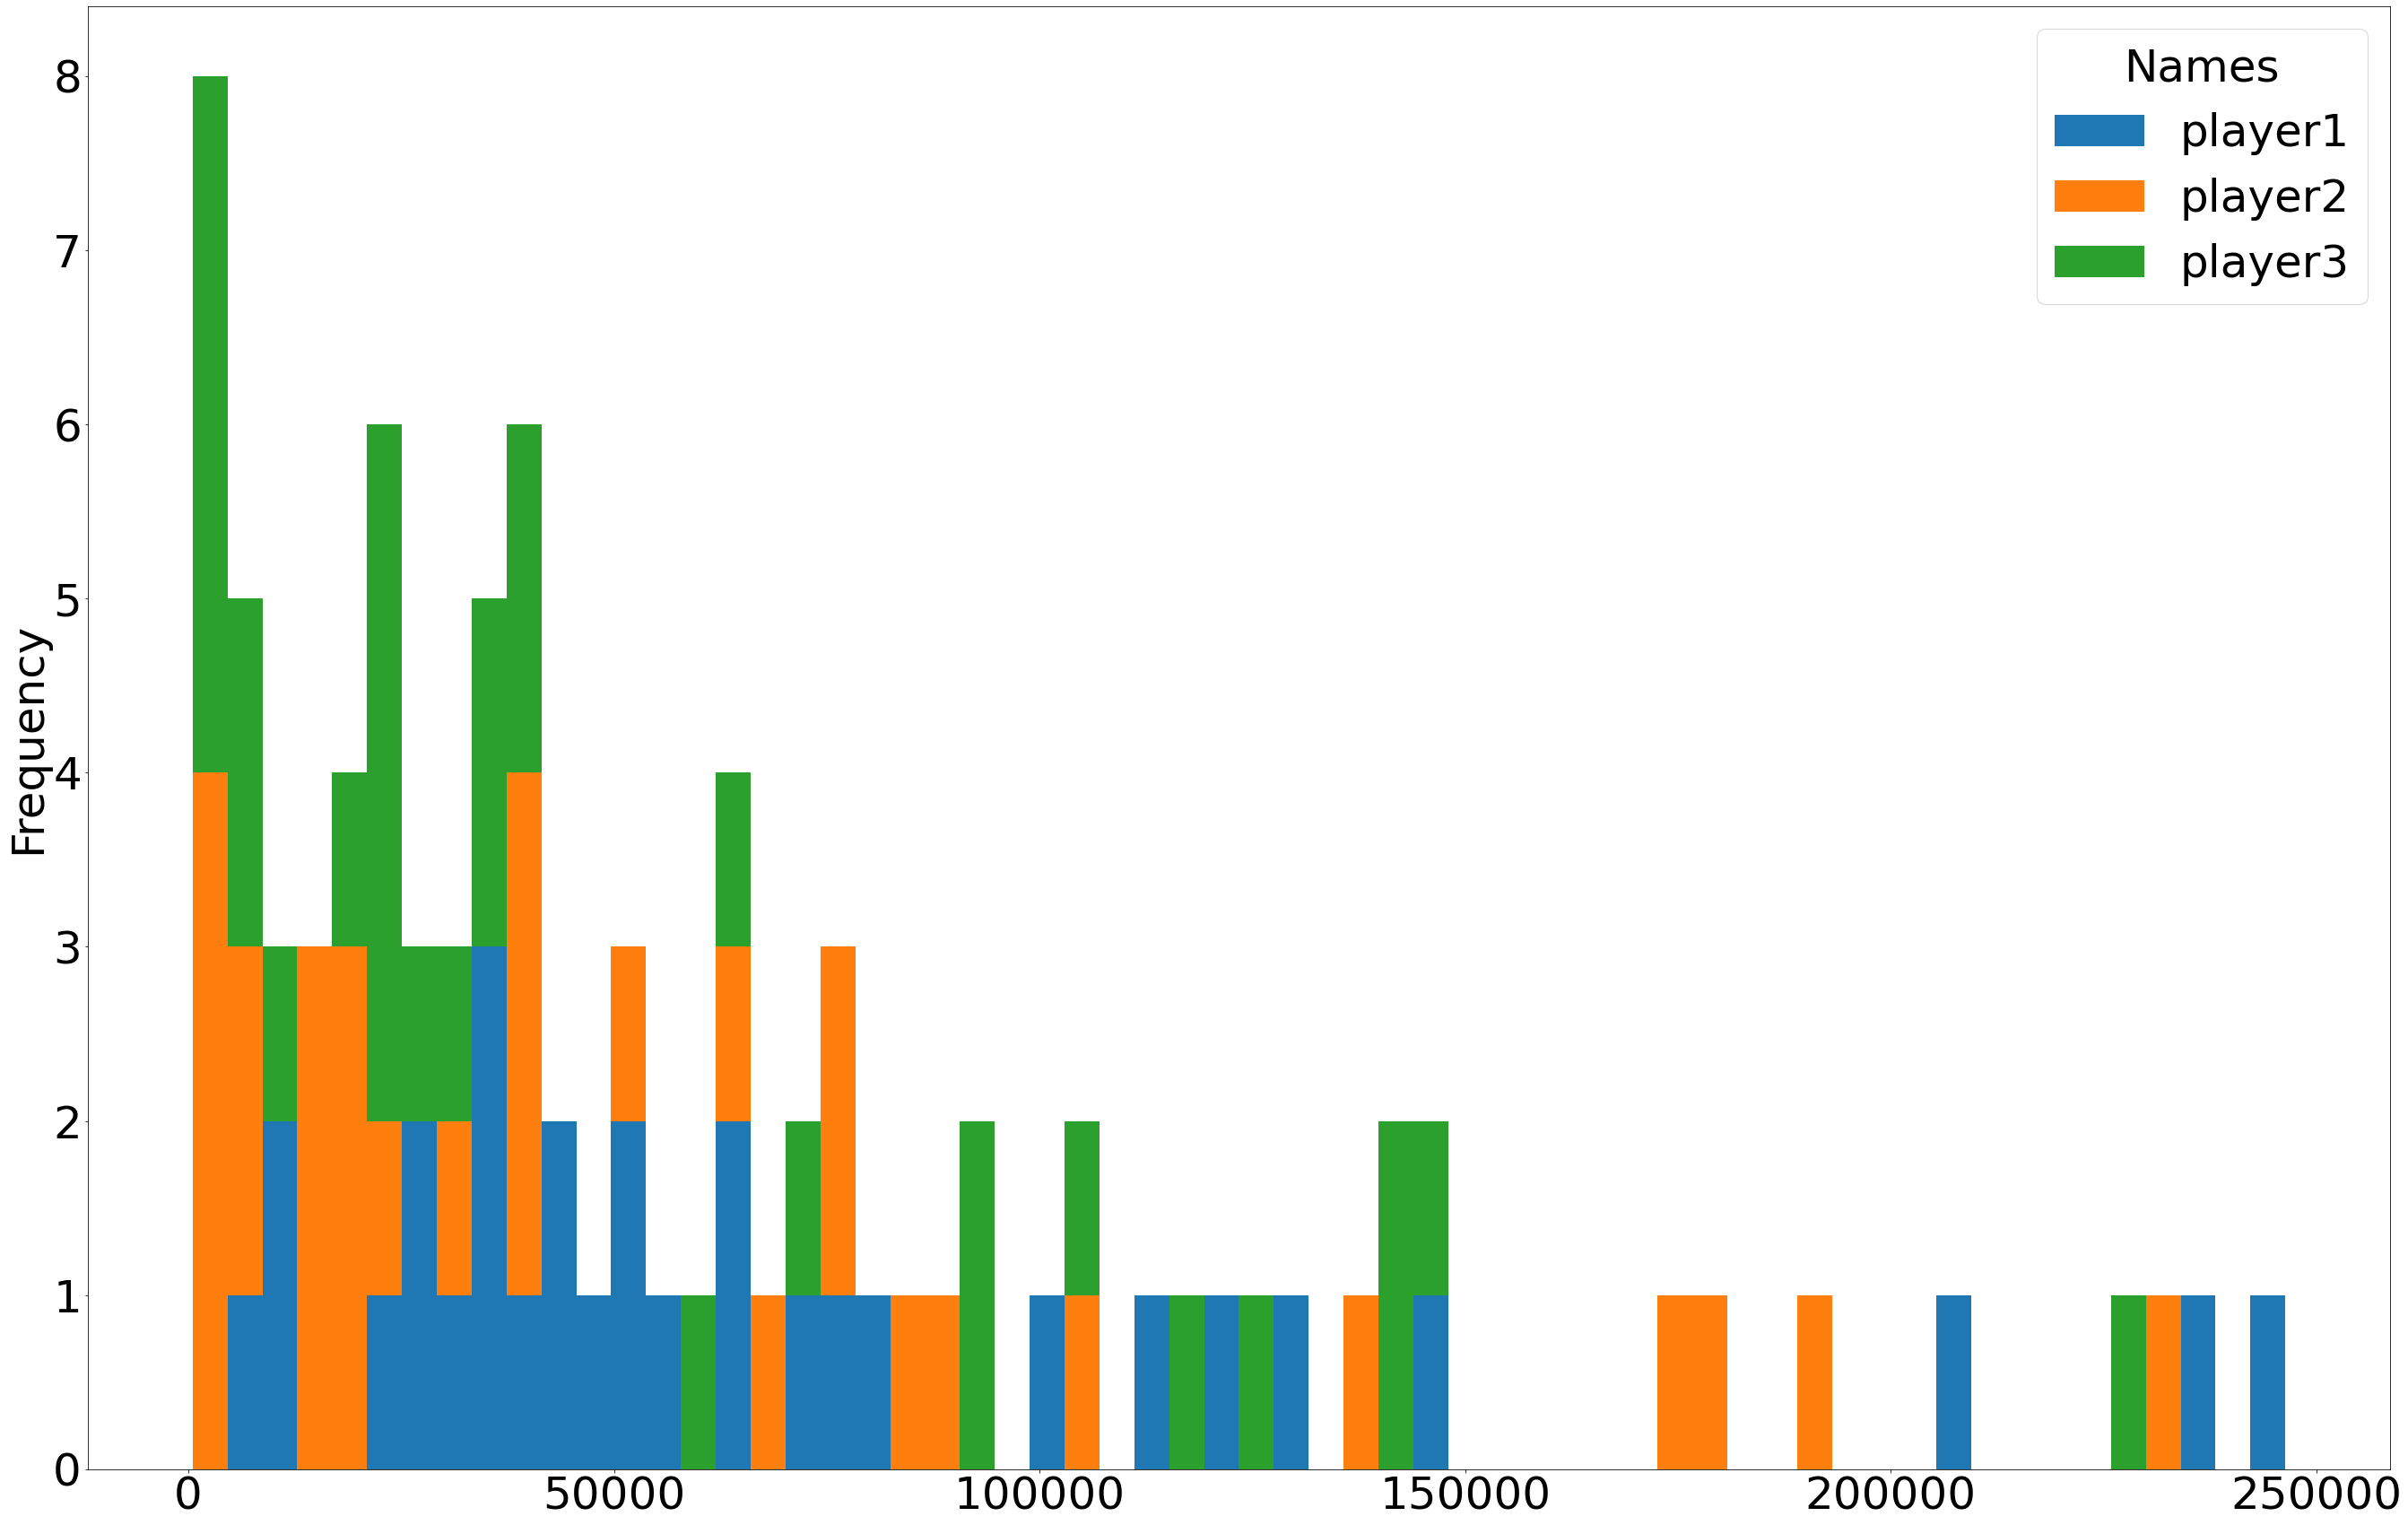

In [50]:
pivot_rating = dataf.pivot(columns="Names")["Rating"]
copy_plot = pivot_rating.plot(kind="hist", bins=60, figsize=(46,30),stacked=True)
copy_plot

# PICK A REGION THAT HAS THE HIGHEST VALUE 
- v1 witouth values
- v2 with values

In [8]:
#ONLY TERRITORIES


# loading shape file (background) and csv file (stats)

import geopandas as gpd

neighborhoods_lisboa = gpd.read_file('destination_data.shp')
neighborhoods_lisboa.head(60)


import pandas as pd

listings = pd.read_csv('listings_lisboa.csv')      
listings.head(2)
#neighborhoods_lisboa



# Creation of a dataframe with average values for neighborhoods
listings_per_neighborhood = listings.groupby(by='neighbourhood').mean()

listings
listings_per_neighborhood

# Merge shapefile with stats file (.csv)


neighborhoods_stats = neighborhoods_lisboa.merge(listings_per_neighborhood, left_on = 'neighbourh', right_on = 'neighbourhood')

neighborhoods_stats.head(2)


# Creation of a dataframe with average values for neighborhoods
listings_per_neighborhood = listings.groupby(by='neighbourhood').mean()[['price','calculated_host_listings_count','availability_365','reviews_per_month','number_of_reviews','minimum_nights']]

listings
listings_per_neighborhood


#Creation of geosource with the merged dataframe

import json
from bokeh.io import show
from bokeh.models import (CDSView, ColorBar, ColumnDataSource,
                          CustomJS, CustomJSFilter, 
                          GeoJSONDataSource, HoverTool,
                          LinearColorMapper, Slider)
from bokeh.layouts import column, row, widgetbox
from bokeh.palettes import brewer
from bokeh.plotting import figure
# Input GeoJSON source that contains features for plotting
geosource = GeoJSONDataSource(geojson = neighborhoods_stats.to_json())



# Creation of the figure object

p = figure(title = 'Airbnb statistics for Lisbon neighborhoods', 
           plot_height = 900 ,
           plot_width = 900, 
           toolbar_location = 'below',
           tools = 'pan, wheel_zoom, box_zoom, reset')
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None

# Addition of patch renderer to figure.
regions = p.patches('xs','ys', source = geosource,
                   fill_color = 'black',
                   line_color = 'white', 
                   hatch_pattern = '@',
                   line_width = 0.25, 
                   fill_alpha = 1)

# Creation of hover tool
p.add_tools(HoverTool(renderers = [regions],
                      tooltips = [
                                ('    NEIGHBORHOOD    ', '@neighbourh'),
                                ]))




p.xaxis.axis_label = "Latitude [ ° ]"
p.xaxis.axis_line_width = 3
p.xaxis.axis_line_color = "black"

p.yaxis.axis_label = "Longitude [ ° ]"
p.yaxis.major_label_text_color = "black"
p.yaxis.major_label_orientation = "vertical"


show(p)


from bokeh.plotting import output_file, save
output_file("Distretti_senza_numeri.html")
save(p)


'C:\\Users\\Matteo\\Documents\\Data Curation files\\Distretti_senza_numeri.html'

In [ ]:
#ONLY TERRITORIES
import pandas as pd
import numpy as np

# loading shape file (background) and csv file (stats)

import geopandas as gpd

neighborhoods_lisboa = gpd.read_file(r'C:\Users\Matteo\Documents\Data Curation files\Data Visualization lessons\geomaps\destination_data.shp')
neighborhoods_lisboa.head(60)


import pandas as pd

listings = pd.read_csv(r'C:\Users\Matteo\Documents\Data Curation files\Data Visualization lessons\datasets\listings_lisboa.csv')      
listings.head(2)
#neighborhoods_lisboa
for i in range(1,8):
    listings[str(i)] = (np.random.rand(len(listings))*100)   #'Random_series_#'+

    
    
# Creation of a dataframe with average values for neighborhoods
listings_per_neighborhood = listings.groupby(by='neighbourhood').mean()[[str(i) for i in range(1,8)]].astype('int64')

listings
listings_per_neighborhood


#neighborhoods_lisboa

# Merge shapefile with stats file (.csv)


neighborhoods_stats = neighborhoods_lisboa.merge(listings_per_neighborhood, left_on = 'neighbourh', right_on = 'neighbourhood')

neighborhoods_stats.head(2)


#print('Unfortunately there is no data available for these neighborhoods:')
#for i in range(0,len(neighborhoods_lisboa['neighbourh'].unique())):
#    if neighborhoods_lisboa['neighbourh'].unique()[i] not in listings['neighbourhood'].unique():
#        print(neighborhoods_lisboa['neighbourh'].unique()[i])
#    else:continue




#Creation of geosource with the merged dataframe

import json
from bokeh.io import show
from bokeh.models import (CDSView, ColorBar, ColumnDataSource,
                          CustomJS, CustomJSFilter, 
                          GeoJSONDataSource, HoverTool,
                          LinearColorMapper, Slider)
from bokeh.layouts import column, row, widgetbox
from bokeh.palettes import brewer
from bokeh.plotting import figure
# Input GeoJSON source that contains features for plotting
geosource = GeoJSONDataSource(geojson = neighborhoods_stats.to_json())



# Creation of the figure object

p = figure(title = 'Airbnb statistics for Lisbon neighborhoods', 
           plot_height = 900 ,
           plot_width = 900, 
           toolbar_location = 'below',
           tools = 'pan, wheel_zoom, box_zoom, reset')
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None

# Addition of patch renderer to figure.
regions = p.patches('xs','ys', source = geosource,
                   fill_color = 'green',
                   line_color = 'darkred', 
                   hatch_pattern = '@',
                   hatch_color = 'black',
                   line_width = 1.75, 
                   fill_alpha = 1)

# Creation of hover tool
p.add_tools(HoverTool(renderers = [regions],
                      tooltips = [
                                ('    NEIGHBORHOOD    ', '@neighbourh'),
                                ('Random series #1','@1'),
                                ('Random series #2','@2'),
                                ('Random series #3', '@3'),
                                ('Random series #4','@4'),
                                ('Random series #5', '@5'),
                                ('Random series #6', '@6'),
                                ('Random series #7', '@7'),
                                ]))



p.background_fill_color = 'darkred'
p.background_fill_alpha = 1

p.border_fill_color = 'darkred'
p.min_border_left = 20

p.outline_line_width = 7
p.outline_line_alpha = 1
p.outline_line_color = None


p.xaxis.axis_label = "Latitude [ ° ]"
p.xaxis.axis_line_width = 3
p.xaxis.axis_line_color = "black"

p.yaxis.axis_label = "Longitude [ ° ]"
p.yaxis.major_label_text_color = "black"
p.yaxis.major_label_orientation = "vertical"


show(p)


from bokeh.plotting import output_file, save
output_file("Distretti_con_numeri161.html")
#save(p)
show(p)


In [2]:
#ONLY TERRITORIES
import pandas as pd
import numpy as np

# loading shape file (background) and csv file (stats)

import geopandas as gpd

neighborhoods_lisboa = gpd.read_file(r'C:\Users\Matteo\Documents\Data Curation files\Data Visualization lessons\destination_data.shp')
neighborhoods_lisboa.head(60)


import pandas as pd

listings = pd.read_csv(r'C:\Users\Matteo\Documents\Data Curation files\Data Visualization lessons\listings_lisboa.csv')      
listings.head(2)

    
    
# Creation of a dataframe with average values for neighborhoods
listings_per_neighborhood = listings.groupby(by='neighbourhood').mean()

listings
listings_per_neighborhood


#neighborhoods_lisboa

# Merge shapefile with stats file (.csv)


neighborhoods_stats = neighborhoods_lisboa.merge(listings_per_neighborhood, left_on = 'neighbourh', right_on = 'neighbourhood')
for i in range(1,8):
    neighborhoods_stats[str(i)] = (np.random.rand(len(neighborhoods_stats))*100).astype('int64')   #'Random_series_#'+

neighborhoods_stats.head(2)



#print('Unfortunately there is no data available for these neighborhoods:')
#for i in range(0,len(neighborhoods_lisboa['neighbourh'].unique())):
#    if neighborhoods_lisboa['neighbourh'].unique()[i] not in listings['neighbourhood'].unique():
#        print(neighborhoods_lisboa['neighbourh'].unique()[i])
#    else:continue




#Creation of geosource with the merged dataframe

import json
from bokeh.io import show
from bokeh.models import (CDSView, ColorBar, ColumnDataSource,
                          CustomJS, CustomJSFilter, 
                          GeoJSONDataSource, HoverTool,
                          LinearColorMapper, Slider)
from bokeh.layouts import column, row, widgetbox
from bokeh.palettes import brewer
from bokeh.plotting import figure
from bokeh.plotting import figure, output_file, show
from bokeh.models import LogTicker, ColorBar,GeoJSONDataSource,LinearColorMapper,LogColorMapper,HoverTool, Slider
from bokeh.layouts import row
from bokeh.io import show
from bokeh.palettes import brewer
# Input GeoJSON source that contains features for plotting
geosource = GeoJSONDataSource(geojson = neighborhoods_stats.to_json())


#creation of color bar
plot_height = 800
plot_width = 500
color_bar_height = plot_height + 11
color_bar_width = 180

#output_file('color_bar.html')



color_mapper = LinearColorMapper(palette="Viridis256", low=neighborhoods_stats['1'].min(), high = neighborhoods_stats['1'].max())



#Define custom tick labels for color bar.
tick_labels = {50: '>50',100:'100',200:'200',250:'250'}
  
color_bar = ColorBar(color_mapper=color_mapper,ticker=LogTicker(),label_standoff=12, border_line_color=None, location=(0,0),major_label_overrides = tick_labels)

color_bar_plot = figure(title="Price per night [€]", title_location="right", 
                        height=color_bar_height, width=color_bar_width, 
                        toolbar_location=None, min_border=0, 
                        outline_line_color=None)

color_bar_plot.add_layout(color_bar, 'right')
color_bar_plot.title.align="center"
color_bar_plot.title.text_font_size = '12pt'



#PLOTTING

palette = LinearColorMapper(palette="Viridis256", low=neighborhoods_stats['1'].min(), high = neighborhoods_stats['1'].max())
color_mapper = LinearColorMapper(palette="Viridis256", low=neighborhoods_stats['1'].min(), high = neighborhoods_stats['1'].max())


# Creation of the figure object

p = figure(title = 'Airbnb statistics for Lisbon neighborhoods', 
           plot_height = 900 ,
           plot_width = 900, 
           toolbar_location = 'below',
           tools = 'pan, wheel_zoom, box_zoom, reset')
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None

# Addition of patch renderer to figure.
regions = p.patches('xs','ys', source = geosource,
                   fill_color = tuple((245, 35, 35)),
                   line_color = tuple((35, 35, 245)), 
                   hatch_pattern = '@',
                   hatch_color = 'black',
                   line_width = 1.75, 
                   fill_alpha = 1)

# Creation of hover tool
p.add_tools(HoverTool(renderers = [regions],
                      tooltips = [
                                ('    NEIGHBORHOOD    ', '@neighbourh'),
                                ('Random series #1','@1')]))#,
                                #('Random series #2','@2'),
                                #('Random series #3', '@3'),
                                #('Random series #4','@4'),
                                #('Random series #5', '@5'),
                                #('Random series #6', '@6'),
                                #('Random series #7', '@7'),
                                #]))



p.background_fill_color = tuple((35, 35, 245))
p.background_fill_alpha = 1

p.border_fill_color = tuple((35, 35, 245))
p.min_border_left = 20

p.outline_line_width = 7
p.outline_line_alpha = 1
p.outline_line_color = None


p.xaxis.axis_label = "Latitude [ ° ]"
p.xaxis.axis_line_width = 3
p.xaxis.axis_line_color = tuple((35, 35, 245))
p.xaxis.major_label_text_color = tuple((245, 35, 35))


p.yaxis.axis_label = "Longitude [ ° ]"
p.yaxis.major_label_text_color = tuple((245, 35, 35))
p.yaxis.major_label_orientation = "vertical"
p.yaxis.axis_line_color = tuple((35, 35, 245))
p.yaxis.axis_line_width = 3

show(p)


from bokeh.plotting import output_file, save
output_file("Distretti_con_numeri_0_100.html")
save(p)


'C:\\Users\\Matteo\\Documents\\Data Curation files\\Distretti_con_numeri_0_100.html'

Text(0.5, 1.0, 'They are random!')

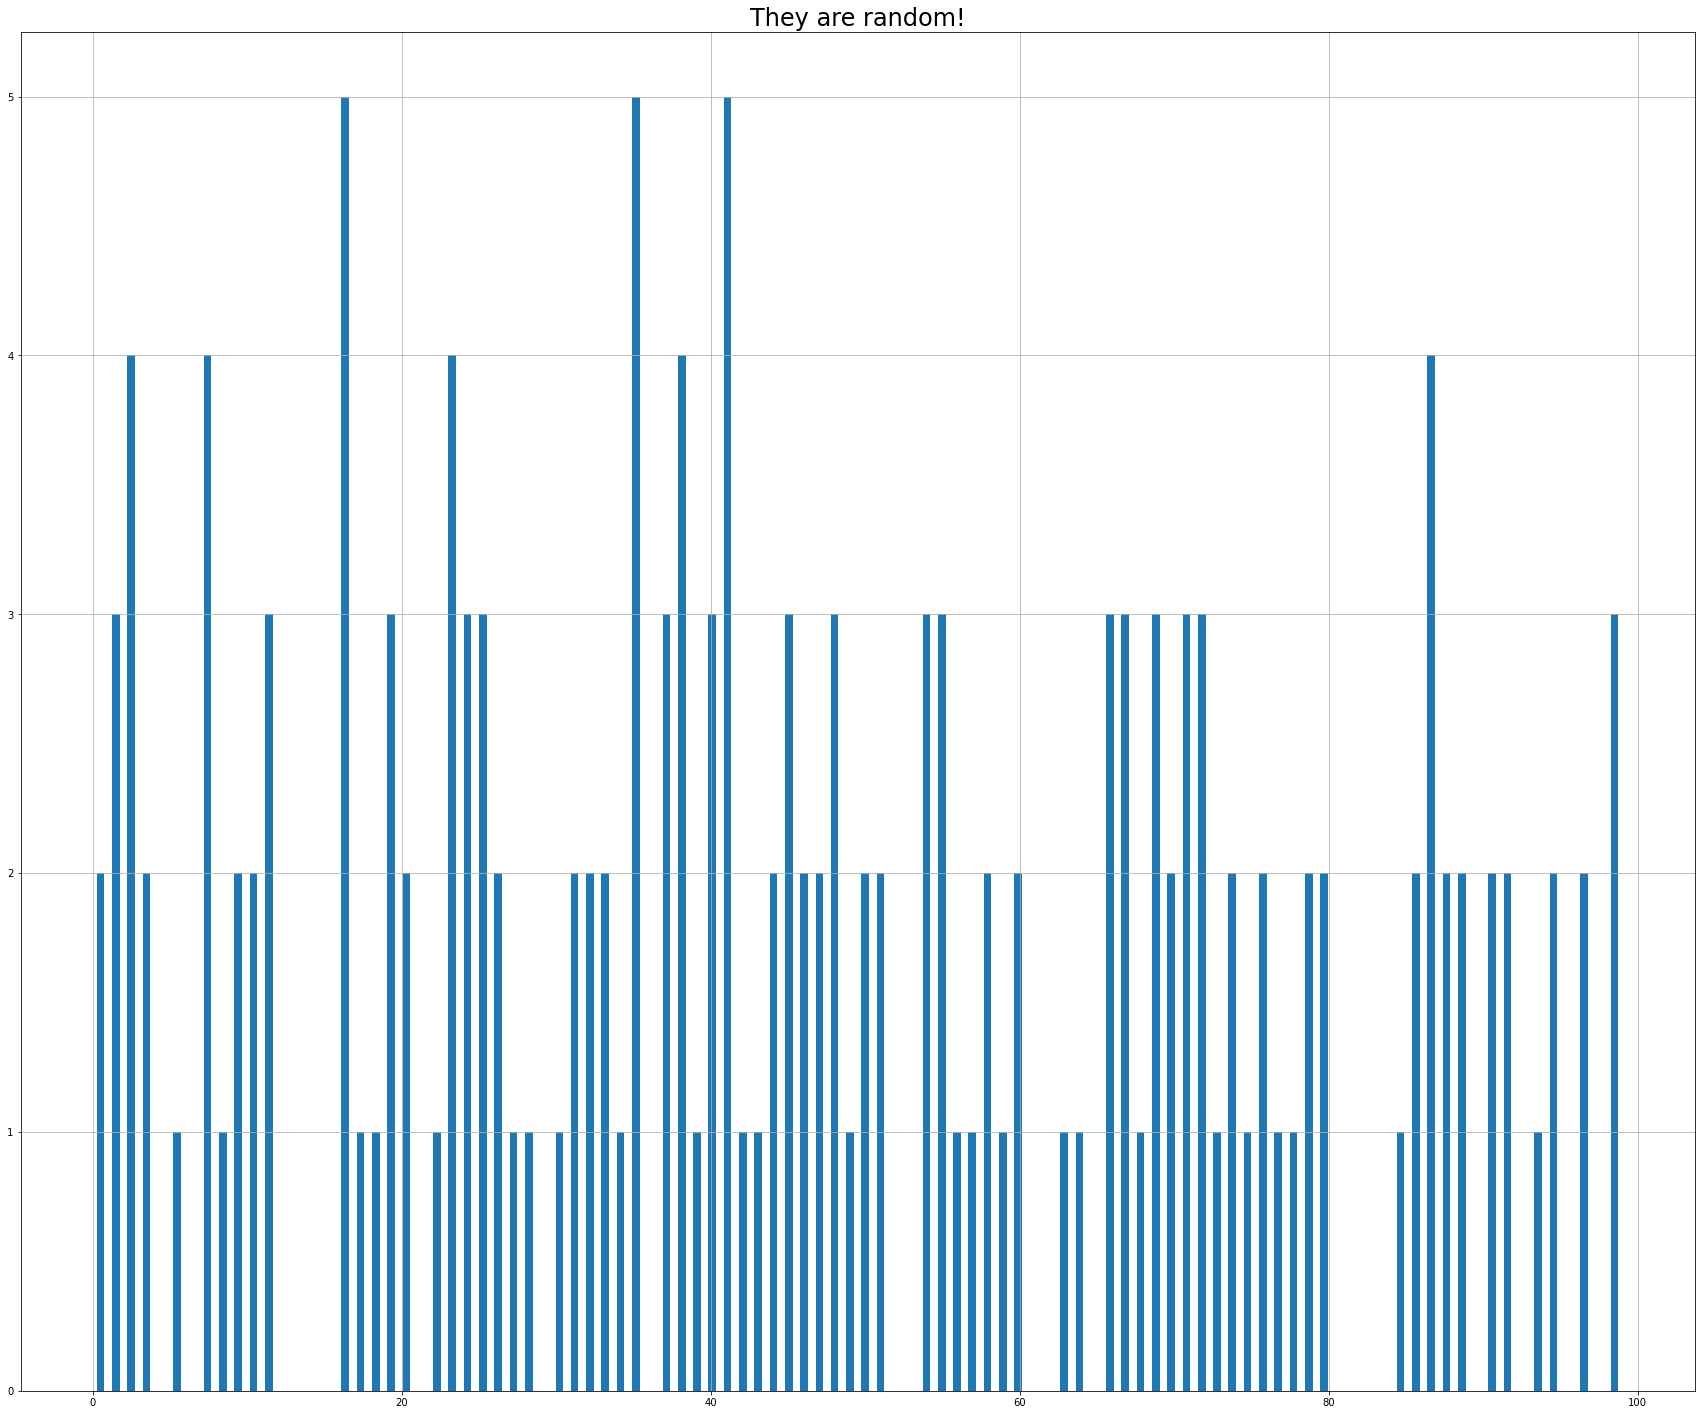

In [67]:
#ONLY TERRITORIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# loading shape file (background) and csv file (stats)

import geopandas as gpd

neighborhoods_lisboa = gpd.read_file(r'C:\Users\Matteo\Documents\Data Curation files\Data Visualization lessons\destination_data.shp')
neighborhoods_lisboa.head(60)


import pandas as pd

listings = pd.read_csv(r'C:\Users\Matteo\Documents\Data Curation files\Data Visualization lessons\listings_lisboa.csv')      
listings.head(2)

    
    
# Creation of a dataframe with average values for neighborhoods
listings_per_neighborhood = listings.groupby(by='neighbourhood').mean()

listings
listings_per_neighborhood


#neighborhoods_lisboa

# Merge shapefile with stats file (.csv)


neighborhoods_stats = neighborhoods_lisboa.merge(listings_per_neighborhood, left_on = 'neighbourh', right_on = 'neighbourhood')
for i in range(1,8):
    neighborhoods_stats[str(i)] = (np.random.rand(len(neighborhoods_stats))*100).astype('int64')   #'Random_series_#'+

neighborhoods_stats.head(2)



neighborhoods_stats.hist('1',bins=100,figsize=(30,25),rwidth=0.5)
plt.rcParams["font.size"] = 20
plt.rcParams["font.size"] = 20
plt.title('They are semi-random!')


# Least n-clicks to find an house

In [34]:
import pandas as pd
import numpy as np
import time
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import sys
sys.path.append(r'C:\Users\Matteo\Documents\Data Curation files\Data Visualization lessons\datasets\listings.csv')
sys.path.append(os.path.dirname(r'C:\Users\Matteo\Documents\Data Curation files\Data Visualization lessons\datasets\listings.csv'))
sys.path.insert(1, r'C:\Users\Matteo\Documents\Data Curation files\Data Visualization lessons\datasets')

#to make the interactive maps
import folium
from folium.plugins import FastMarkerCluster
#import geopandas as gpd
from branca.colormap import LinearColormap

plt.rcParams["figure.figsize"]=(8,8*0.6)
plt.rcParams["figure.dpi"]=150


listings_small = pd.read_csv("listings.csv",index_col=0)
lisbon_listings= listings_small.loc[listings_small.neighbourhood_group=="Lisboa"].copy()


lats2018 = lisbon_listings['latitude'].tolist()
lons2018 = lisbon_listings['longitude'].tolist()
locations = list(zip(lats2018, lons2018))

map1 = folium.Map(location=[38.70744475993871, -9.136274013769265],
                  zoom_start=13,control_scale=True,)
                  #height=500,width=1500)
FastMarkerCluster(data=locations,).add_to(map1)
map1

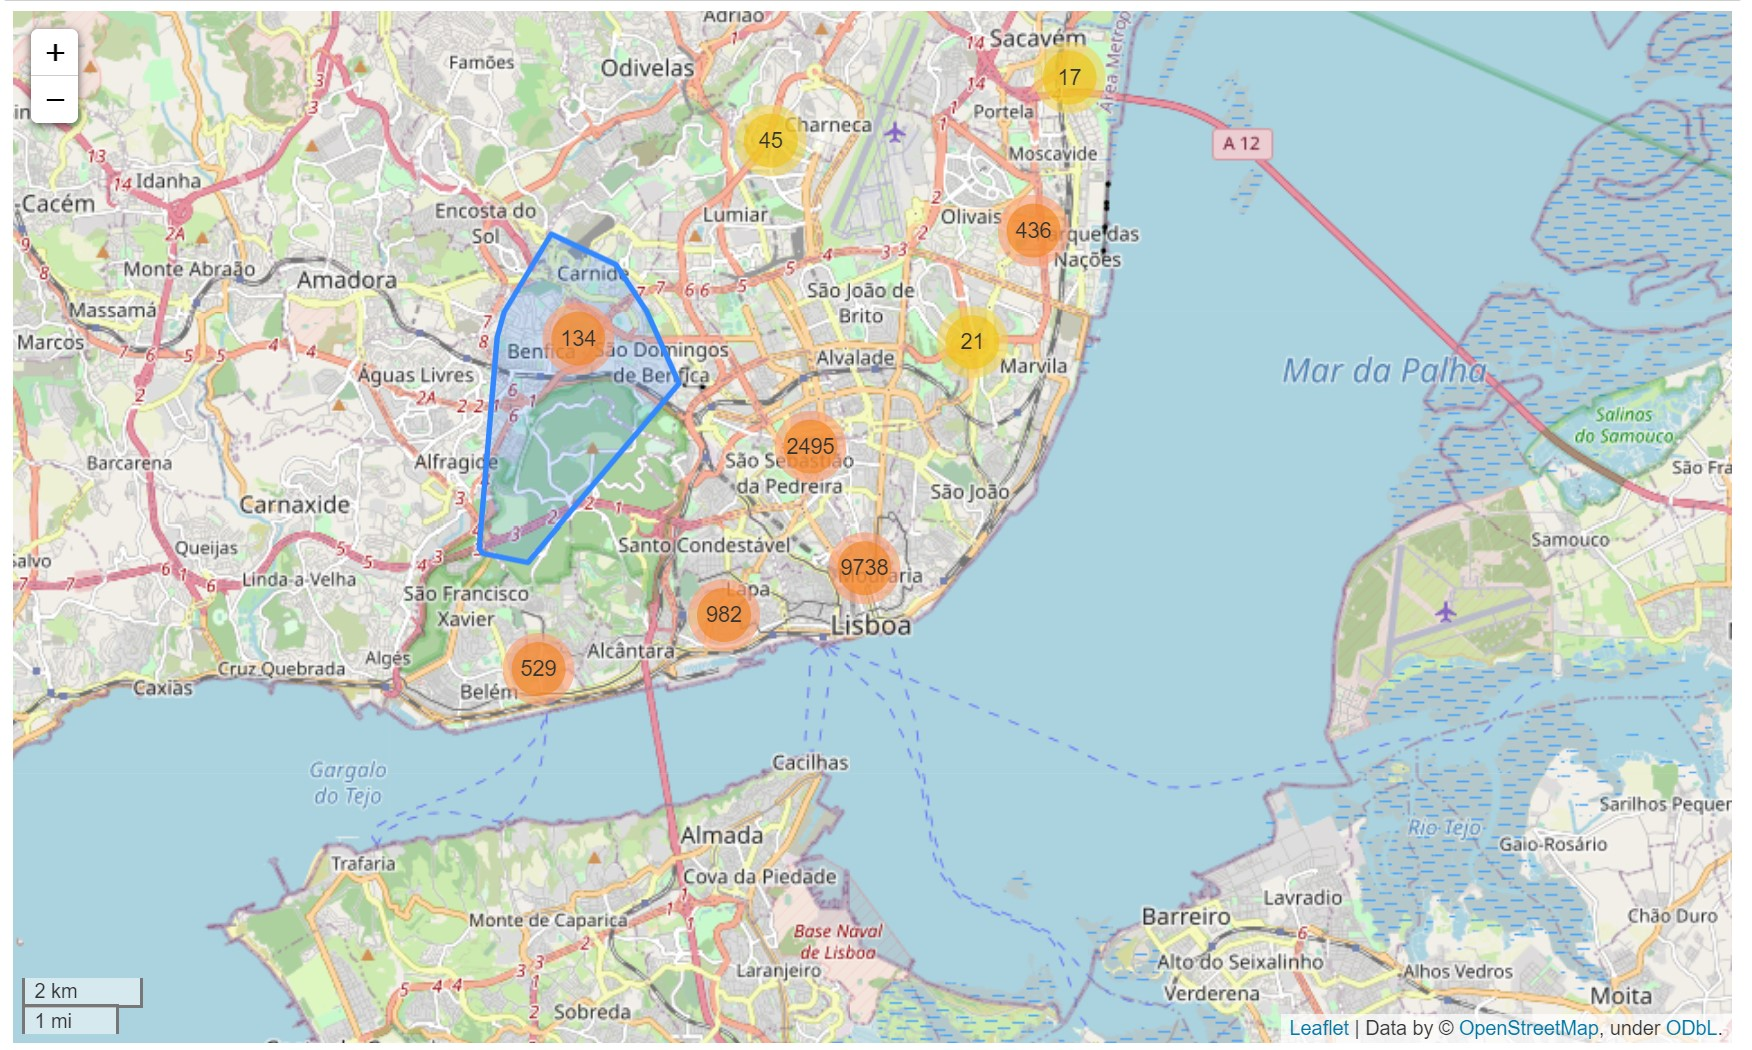

In [11]:
from IPython.display import Image
Image(filename='screen2.jpg') 

# Other version n-clicks

In [14]:
import pandas as pd
import numpy as np
import time
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import branca
import requests
import json
#to make the interactive maps
import folium
from folium.plugins import FastMarkerCluster
#import geopandas as gpd
from branca.colormap import LinearColormap

plt.rcParams["figure.figsize"]=(8,8*0.6)
plt.rcParams["figure.dpi"]=150


listings_small = pd.read_csv('worldcities.csv')
lisbon_listings= pd.read_csv('worldcities.csv')


lats2018 = lisbon_listings['lat'].tolist()
lons2018 = lisbon_listings['lng'].tolist()
locations = list(zip(lats2018, lons2018))

map1 = folium.Map(location=[38.70744475993871, -9.136274013769265],
                  zoom_start=2,control_scale=True)
folium.Marker(
                      location=[45.3288, -121.6625],
                      popup='Mt. Hood Meadows',
                      icon=folium.Icon(icon='cloud')
                  ).add_to(map1)
                  
folium.Marker(
                      location=[45.3311, -121.7113],
                      popup='Timberline Lodge',
                      icon=folium.Icon(color='green')
                  ).add_to(map1)
                  
folium.Marker(
                      location=[45.3300, -121.6823],
                      popup='Some Other Location',
                      icon=folium.Icon(color='red', icon='info-sign')
                  ).add_to(map1)
                  #height=500,width=1500)
    
    
folium.Circle(
    radius=100,
    location=[45.5244, -122.6699],
    popup='The Waterfront',
    color='crimson',
    fill=False,
).add_to(map1)

folium.CircleMarker(
    location=[38.70744475993871, -9.136274013769265],
    radius=5,
    popup='Lisboa',
    color='#3186cc',
    fill=True,
    fill_color='#3186cc'
).add_to(map1)

    
'''
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
state_geo = f'{url}/us-states.json'
state_unemployment = f'{url}/US_Unemployment_Oct2012.csv'
state_data = pd.read_csv(state_unemployment)


folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=state_data,
    columns=['State', 'Unemployment'],
    key_on='feature.id',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Unemployment Rate (%)'
).add_to(map1)

folium.LayerControl().add_to(map1)
'''




url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
county_data = f'{url}/us_county_data.csv'
county_geo = f'{url}/us_counties_20m_topo.json'


df = pd.read_csv(county_data, na_values=[' '])

colorscale = branca.colormap.linear.YlOrRd_09.scale(0, 50e3)
employed_series = df.set_index('FIPS_Code')['Employed_2011']

colorscale = branca.colormap.linear.YlGnBu_09.scale(0, 30)

employed_series = df.set_index('FIPS_Code')['Unemployment_rate_2011']


def style_function(feature):
    employed = employed_series.get(int(feature['id'][-5:]), None)
    return {
        'fillOpacity': 0.5,
        'weight': 0,
        'fillColor': '#black' if employed is None else colorscale(employed)
    }



folium.TopoJson(
    json.loads(requests.get(county_geo).text),
    'objects.us_counties_20m',
    style_function=style_function
).add_to(map1)




aaa=folium.Marker(
                      location=[46.07105869801478, 13.205596125092482],
                      popup='Mi Casa',
                      icon=folium.Icon(icon='cloud'),
                  )
lista_num = [i for i in range(5,7)]
if  folium.Map(zoom_start=lista_num):
            
    aaa.add_to(map1)







FastMarkerCluster(data=locations,).add_to(map1)
map1



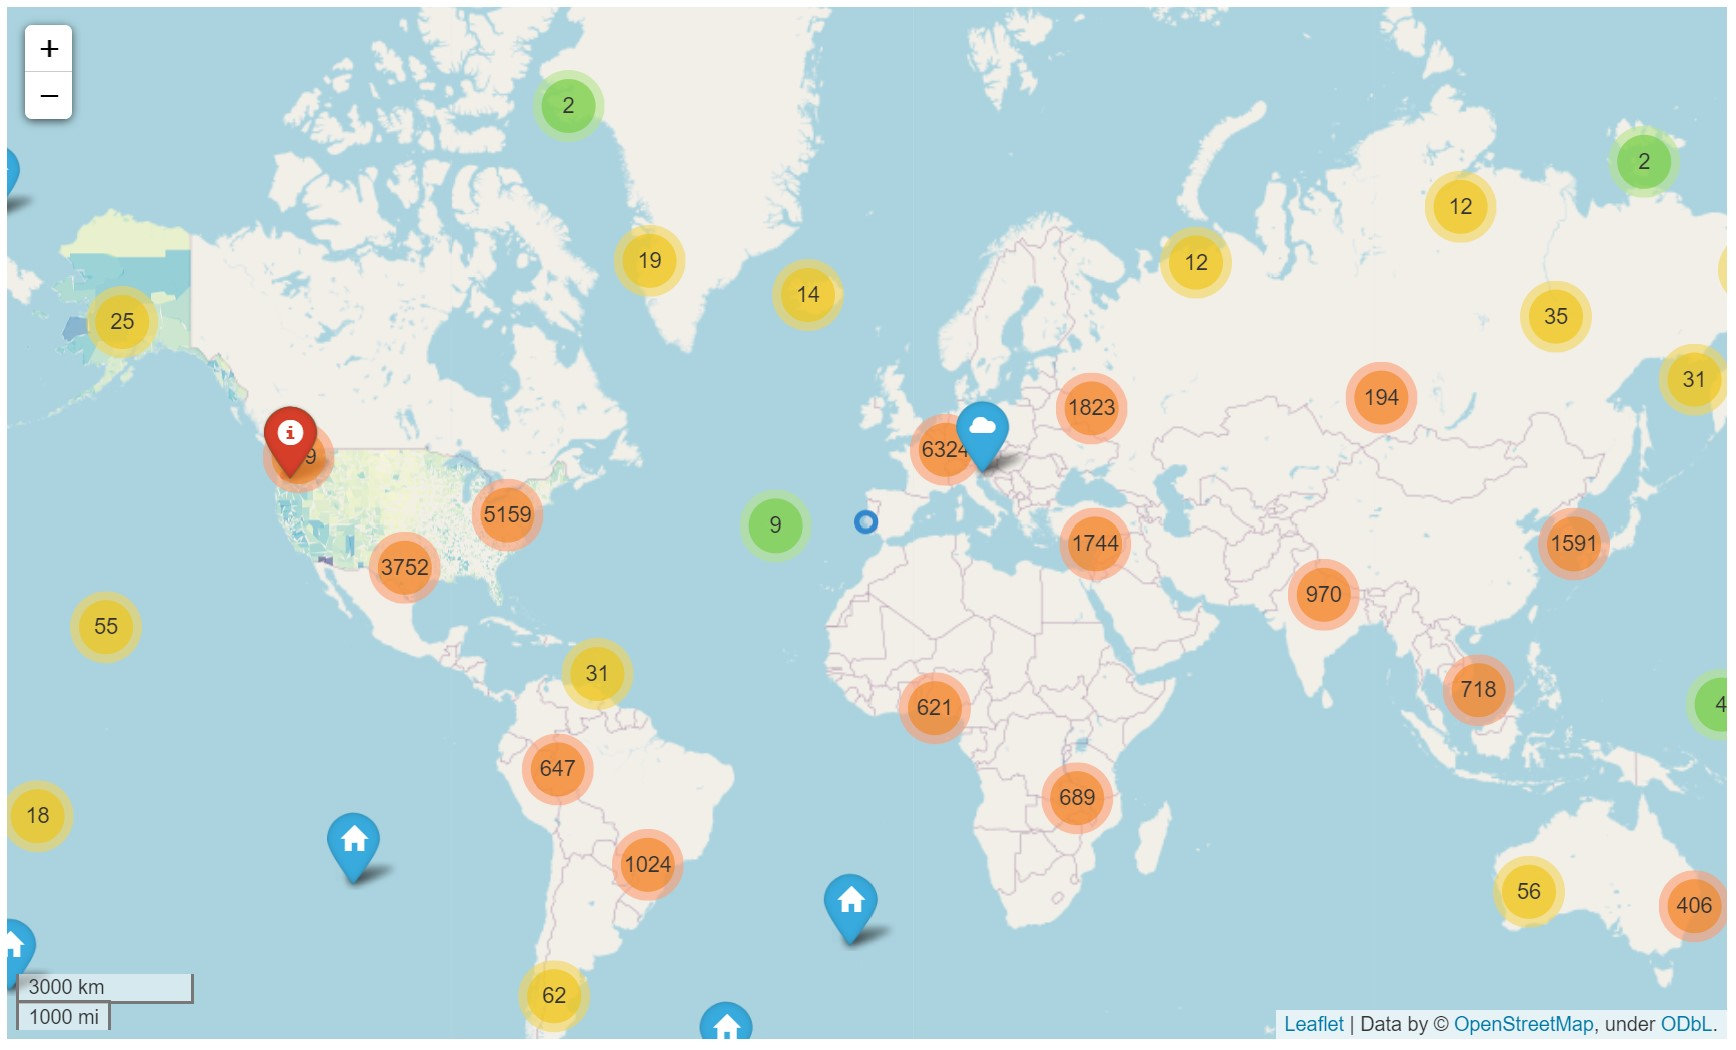

In [13]:
from IPython.display import Image
Image(filename='screen3.jpg') 

In [36]:
pd.read_csv('worldcities.csv')

city   city_ascii      lat       lng      country iso2 iso3  \
0            Tokyo        Tokyo  35.6897  139.6922        Japan   JP  JPN   
1          Jakarta      Jakarta  -6.2146  106.8451    Indonesia   ID  IDN   
2            Delhi        Delhi  28.6600   77.2300        India   IN  IND   
3           Mumbai       Mumbai  18.9667   72.8333        India   IN  IND   
4           Manila       Manila  14.5958  120.9772  Philippines   PH  PHL   
...            ...          ...      ...       ...          ...  ...  ...   
26564         Nord         Nord  81.7166  -17.8000    Greenland   GL  GRL   
26565  Timmiarmiut  Timmiarmiut  62.5333  -42.2167    Greenland   GL  GRL   
26566  Cheremoshna  Cheremoshna  51.3894   30.0989      Ukraine   UA  UKR   
26567    Ambarchik    Ambarchik  69.6510  162.3336       Russia   RU  RUS   
26568      Nordvik      Nordvik  74.0165  111.5100       Russia   RU  RUS   

               admin_name  capital  population          id  
0                   Tōkyō  primary  37977000.0  1392685764  
1                 Jakarta  primary  34540000.0  1360771077  
2                   Delhi    admin  29617000.0  1356872604  
3             Mahārāshtra    admin  23355000.0  1356226629  
4                  Manila  primary  23088000.0  1608618140  
...                   ...      ...         ...         ...  
26564          Sermersooq      NaN        10.0  1304217709  
26565            Kujalleq      NaN        10.0  1304206491  
26566   Kyyivs’ka Oblast’      NaN         0.0  1804043438  
26567    Sakha (Yakutiya)      NaN         0.0  1643739159  
26568  Krasnoyarskiy Kray      NaN         0.0  1643587468  

[26569 rows x 11 columns]

In [5]:
import altair as alt
from vega_datasets import data

states = alt.topo_feature(data.us_10m.url, 'states')
source = data.population_engineers_hurricanes.url
variable_list = ['population', 'engineers', 'hurricanes']

alt.Chart(states).mark_geoshape().encode(
    alt.Color(alt.repeat('row'), type='quantitative')
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(source, 'id', variable_list)
).properties(
    width=500,
    height=300
).project(
    type='albersUsa'
).repeat(
    row=variable_list
).resolve_scale(
    color='independent'
)

alt.RepeatChart(...)